In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Preprocessing

In [300]:
"""
定義資料集
"""
class StockDataset(Dataset):
    def __init__(self, data, lookback):
        self.data = data
        self.lookback = lookback

    def __getitem__(self, index):
        x = torch.Tensor(self.data[index:index+self.lookback, 1:-1])
        y = torch.Tensor([self.data[index+self.lookback-1, -1]])
        return x, y

    def __len__(self):
        return self.data.shape[0] - self.lookback

In [301]:
stock_id = "2330"
total_features_name = 'data/{}_Total_features.csv'.format(stock_id)

#處理重複欄位跟缺失值 以及過多缺失值的欄位
df = pd.read_csv(total_features_name, index_col='date')
df = df.drop(columns=['股價','借券賣出_當日調整'])
df = df.dropna()
df

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"20,001-30,000(股)","30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上"
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,240.0,240.0,240.0,238.0,23721.0,8659.0,5.681935e+09,2.74,0.5,19104797.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-08,242.0,242.0,242.5,240.5,21846.0,10251.0,5.281823e+09,2.13,2.0,17528008.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-09,242.0,242.0,242.0,239.5,19043.0,7124.0,4.588314e+09,2.67,0.0,13841045.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-10,241.5,236.5,242.0,236.0,25716.0,10534.0,6.118683e+09,2.44,-5.5,13967976.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
2018-01-11,235.0,235.0,236.0,232.5,32070.0,9199.0,7.500674e+09,3.49,-1.5,19103515.0,...,0.40,0.28,0.23,0.70,0.80,1.07,0.77,0.66,0.69,91.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,506.0,505.0,508.0,503.0,38781.0,48051.0,1.957397e+10,0.81,5.0,31958707.0,...,0.70,0.46,0.34,1.03,1.05,1.25,0.87,0.82,0.77,85.78
2023-01-17,504.0,503.0,504.0,499.5,29443.0,27930.0,1.478466e+10,1.05,-2.0,21110197.0,...,0.70,0.46,0.34,1.03,1.05,1.25,0.87,0.82,0.77,85.78
2023-01-19,504.0,503.0,504.0,499.5,29443.0,27930.0,1.478466e+10,1.05,-2.0,21110197.0,...,0.68,0.45,0.34,1.02,1.04,1.25,0.90,0.80,0.74,86.05


In [302]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

df

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"20,001-30,000(股)","30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上"
date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,0.061181,0.067368,0.059811,0.066808,0.119356,0.021746,0.054955,0.254963,0.483660,0.142837,...,0.030303,0.05,0.076923,0.028571,0.00,0.107143,0.16,0.05,0.571429,0.978626
2018-01-08,0.065401,0.071579,0.065058,0.072110,0.108232,0.027130,0.050363,0.191223,0.503268,0.130995,...,0.030303,0.05,0.076923,0.028571,0.00,0.107143,0.16,0.05,0.571429,0.978626
2018-01-09,0.065401,0.071579,0.064008,0.069989,0.091603,0.016555,0.042404,0.247649,0.477124,0.103304,...,0.030303,0.05,0.076923,0.028571,0.00,0.107143,0.16,0.05,0.571429,0.978626
2018-01-10,0.064346,0.060000,0.064008,0.062566,0.131192,0.028087,0.059968,0.223615,0.405229,0.104258,...,0.030303,0.05,0.076923,0.028571,0.00,0.107143,0.16,0.05,0.571429,0.978626
2018-01-11,0.050633,0.056842,0.051417,0.055143,0.168889,0.023572,0.075829,0.333333,0.457516,0.142827,...,0.030303,0.05,0.076923,0.028571,0.00,0.107143,0.16,0.05,0.571429,0.978626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,0.622363,0.625263,0.622246,0.628844,0.208705,0.154967,0.214396,0.053292,0.542484,0.239373,...,0.939394,0.95,0.923077,0.971429,1.00,0.750000,0.56,0.85,0.952381,0.041221
2023-01-17,0.618143,0.621053,0.613851,0.621421,0.153304,0.086919,0.159428,0.078370,0.450980,0.157898,...,0.939394,0.95,0.923077,0.971429,1.00,0.750000,0.56,0.85,0.952381,0.041221
2023-01-19,0.618143,0.621053,0.613851,0.621421,0.153304,0.086919,0.159428,0.078370,0.450980,0.157898,...,0.878788,0.90,0.923077,0.942857,0.96,0.750000,0.68,0.75,0.809524,0.082443


In [303]:
# 創建標籤
df['Label'] = df['收盤價'].rolling(15).apply(lambda x: 1 if list(x)[-1] / list(x)[0] - 1 > 0.07 else 0, raw=True)
df = df.dropna()
df

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,買進_外陸資買進股數(不含外資自營商),...,"30,001-40,000(股)","40,001-50,000(股)","50,001-100,000(股)","100,001-200,000(股)","200,001-400,000(股)","400,001-600,000(股)","600,001-800,000(股)","800,001-1,000,000(股)","1,000,001(股)以上",Label
date,,,,,,,,,,,,,,,,,,,,,
2018-01-25,0.099156,0.105263,0.110178,0.106045,0.252803,0.045984,0.127251,0.273772,0.477124,0.249479,...,0.00,0.076923,0.000000,0.00,0.071429,0.16,0.10,0.476190,1.000000,1.0
2018-01-26,0.095992,0.098947,0.096537,0.099682,0.236785,0.035822,0.117162,0.322884,0.437908,0.196885,...,0.00,0.000000,0.000000,0.00,0.107143,0.24,0.10,0.523810,1.000000,1.0
2018-01-29,0.101266,0.106316,0.104932,0.102863,0.164357,0.033759,0.082338,0.236155,0.522876,0.129802,...,0.00,0.000000,0.000000,0.00,0.107143,0.24,0.10,0.523810,1.000000,1.0
2018-01-30,0.094937,0.094737,0.096537,0.097561,0.200571,0.036383,0.099051,0.269592,0.405229,0.151488,...,0.00,0.000000,0.000000,0.00,0.107143,0.24,0.10,0.523810,1.000000,1.0
2018-01-31,0.088608,0.098947,0.096537,0.096501,0.250389,0.038297,0.123688,0.321839,0.503268,0.254194,...,0.00,0.000000,0.000000,0.00,0.107143,0.24,0.10,0.523810,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16,0.622363,0.625263,0.622246,0.628844,0.208705,0.154967,0.214396,0.053292,0.542484,0.239373,...,0.95,0.923077,0.971429,1.00,0.750000,0.56,0.85,0.952381,0.041221,1.0
2023-01-17,0.618143,0.621053,0.613851,0.621421,0.153304,0.086919,0.159428,0.078370,0.450980,0.157898,...,0.95,0.923077,0.971429,1.00,0.750000,0.56,0.85,0.952381,0.041221,1.0
2023-01-19,0.618143,0.621053,0.613851,0.621421,0.153304,0.086919,0.159428,0.078370,0.450980,0.157898,...,0.90,0.923077,0.942857,0.96,0.750000,0.68,0.75,0.809524,0.082443,1.0


In [304]:
# 資料前處理：將所有的非數值資料轉換為數值型態
df = df.apply(pd.to_numeric, errors='coerce')

In [305]:
#分割訓練集
train_size = int(len(df) * 0.7)
train_set = df[:train_size]
val_set = df[train_size:]

print("train size :"+str(len(train_set))+" "+"val size:"+str(len(val_set)))

train size :865 val size:371


In [306]:
# 技術面指標
tech_train_set = train_set[['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅']]
tech_val_set = val_set[['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅']]
# 籌碼面
chip_train_set = train_set.drop(columns=['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅'])
chip_val_set = val_set.drop(columns=['開盤價','收盤價','最高價','最低價','成交張數','成交筆數','成交金額','成交均張','漲跌幅'])

## Feature Selection

In [307]:
# RF MDI 尋找籌碼面的特徵重要性
from sklearn.ensemble import RandomForestClassifier

X_train = chip_train_set.drop('Label',axis=1)
y_train = chip_train_set['Label']
X_val = chip_val_set.drop('Label',axis=1)
y_val = chip_val_set['Label']

rf = RandomForestClassifier(n_estimators=1000, max_features=1 ,n_jobs=-1,bootstrap=False)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=1, n_estimators=1000,
                       n_jobs=-1)

In [308]:
feature_names = X_train.columns

# 計算特徵重要性
importances = myMethod.featImpMDI(rf, feature_names)

importances = importances.sort_values('mean',ascending=False)

# 抓前10個特徵
importances = importances.head(10)
importances

,mean,std
累計_融資_增減(張),0.026249,0.000931
融資_融資今日餘額(張),0.024094,0.000841
累計_買進_自營商買進股數(自行買賣+避險),0.022014,0.000651
累計_三大法人賣出股數,0.021857,0.000644
累計_賣出_自營商賣出股數(自行買賣+避險),0.021558,0.000628
累計_賣出_外陸資賣出股數(不含外資自營商),0.021429,0.000612
累計_賣出_投信賣出股數,0.021428,0.000644
累計_融資_融資買進(張),0.021405,0.000630
三大法人買賣超股數,0.021259,0.000685
累計_借券賣出_當日賣出,0.021132,0.000616


In [309]:
new_train_set = pd.concat([tech_train_set, chip_train_set[importances.index]], axis=1)

new_val_set = pd.concat([tech_val_set,chip_val_set[importances.index]],axis=1)

new_train_set['Label'] = train_set['Label']
new_val_set['Label'] = val_set['Label']

new_train_set

,開盤價,收盤價,最高價,最低價,成交張數,成交筆數,成交金額,成交均張,漲跌幅,累計_融資_增減(張),融資_融資今日餘額(張),累計_買進_自營商買進股數(自行買賣+避險),累計_三大法人賣出股數,累計_賣出_自營商賣出股數(自行買賣+避險),累計_賣出_外陸資賣出股數(不含外資自營商),累計_賣出_投信賣出股數,累計_融資_融資買進(張),三大法人買賣超股數,累計_借券賣出_當日賣出,Label
date,,,,,,,,,,,,,,,,,,,,
2018-01-25,0.099156,0.105263,0.110178,0.106045,0.252803,0.045984,0.127251,0.273772,0.477124,0.021980,0.022159,0.008978,0.008983,0.006822,0.009012,0.013965,0.004927,0.497373,0.011256,1.0
2018-01-26,0.095992,0.098947,0.096537,0.099682,0.236785,0.035822,0.117162,0.322884,0.437908,0.042959,0.043281,0.009808,0.009840,0.007132,0.009843,0.019161,0.005675,0.472976,0.012036,1.0
2018-01-29,0.101266,0.106316,0.104932,0.102863,0.164357,0.033759,0.082338,0.236155,0.522876,0.057650,0.058072,0.010684,0.010298,0.007399,0.010305,0.019972,0.006480,0.495446,0.013655,1.0
2018-01-30,0.094937,0.094737,0.096537,0.097561,0.200571,0.036383,0.099051,0.269592,0.405229,0.073927,0.074460,0.011428,0.011037,0.007711,0.011062,0.020577,0.007253,0.456444,0.013662,1.0
2018-01-31,0.088608,0.098947,0.096537,0.096501,0.250389,0.038297,0.123688,0.321839,0.503268,0.072925,0.073452,0.013509,0.012128,0.008126,0.012190,0.020688,0.007560,0.486697,0.013740,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23,0.803797,0.793684,0.798531,0.798515,0.071799,0.072394,0.095404,0.037618,0.398693,0.604797,0.601199,0.684841,0.727231,0.726177,0.727284,0.726153,0.719883,0.430449,0.714828,0.0
2021-07-26,0.801688,0.783158,0.796432,0.792153,0.111768,0.120387,0.139974,0.030303,0.411765,0.615147,0.611620,0.685292,0.727747,0.726577,0.727799,0.727114,0.720408,0.431916,0.715130,0.0
2021-07-27,0.780591,0.783158,0.781742,0.792153,0.090903,0.060767,0.115968,0.066876,0.477124,0.614424,0.610892,0.685864,0.728159,0.726628,0.728219,0.728152,0.720692,0.462666,0.715143,0.0


In [310]:
# 轉換成numpy array
train_set_np = new_train_set.values
test_set_np = new_val_set.values

In [311]:
# 創建 DataLoader
lookback = 15
train_data = StockDataset(train_set_np, lookback)
test_data = StockDataset(test_set_np, lookback)
train_loader = DataLoader(train_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## Model

In [312]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold

In [313]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [314]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.view(-1)

In [315]:
# 定義交叉驗證參數
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

fold_scores = []
best_score = 0
# 執行交叉驗證
for fold, (train_index, val_index) in enumerate(kf.split(train_data)):
    # 根據fold拆分成訓練和驗證數據
    train_data_fold = torch.utils.data.Subset(train_data, train_index)
    val_data_fold = torch.utils.data.Subset(train_data, val_index)

    # 創建訓練和驗證的DataLoader
    train_loader_fold = DataLoader(train_data_fold, batch_size=32, shuffle=False)
    val_loader_fold = DataLoader(val_data_fold, batch_size=32, shuffle=False)

    # 初始化模型，定義損失函數和優化器
    model = LSTM(input_size=train_set_np.shape[1]-2, hidden_size=50, num_layers=2).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 訓練模型
    num_epochs = 500
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(train_loader_fold):
            inputs = inputs.to(device).float()
            labels = labels.to(device).float().view(-1)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # print loss
            if (i+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_fold)}], Loss: {loss.item():.4f}')
    
    #評估模型
    model.eval()
    with torch.no_grad():
        true_labels = []
        pred_labels = []
        for inputs, labels in val_loader_fold:
            inputs = inputs.to(device).float()
            labels = labels.to(device).float()
            outputs = model(inputs)
            preds = (torch.sigmoid(outputs) > 0.5).int()
            true_labels.extend(labels.tolist())
            pred_labels.extend(preds.tolist())
    # 計算準確率
    accuracy = accuracy_score(true_labels, pred_labels)
    # 將當前fold的結果存放到列表中
    fold_scores.append(accuracy)

    # 判斷當前fold的準確率是否為最佳準確率
    if accuracy > best_score:
        best_model = model
        best_score = accuracy

Epoch [1/500], Step [10/22], Loss: 0.7810
Epoch [1/500], Step [20/22], Loss: 0.6485
Epoch [2/500], Step [10/22], Loss: 0.7672
Epoch [2/500], Step [20/22], Loss: 0.6098
Epoch [3/500], Step [10/22], Loss: 0.7762
Epoch [3/500], Step [20/22], Loss: 0.5441
Epoch [4/500], Step [10/22], Loss: 0.7777
Epoch [4/500], Step [20/22], Loss: 0.4082
Epoch [5/500], Step [10/22], Loss: 0.6569
Epoch [5/500], Step [20/22], Loss: 0.3124
Epoch [6/500], Step [10/22], Loss: 0.5998
Epoch [6/500], Step [20/22], Loss: 0.2628
Epoch [7/500], Step [10/22], Loss: 0.5893
Epoch [7/500], Step [20/22], Loss: 0.3462
Epoch [8/500], Step [10/22], Loss: 0.6056
Epoch [8/500], Step [20/22], Loss: 0.2443
Epoch [9/500], Step [10/22], Loss: 0.5570
Epoch [9/500], Step [20/22], Loss: 0.6227
Epoch [10/500], Step [10/22], Loss: 0.6667
Epoch [10/500], Step [20/22], Loss: 0.5048
Epoch [11/500], Step [10/22], Loss: 0.6591
Epoch [11/500], Step [20/22], Loss: 0.4046
Epoch [12/500], Step [10/22], Loss: 0.5626
Epoch [12/500], Step [20/22],

In [316]:
# print 每個fold的結果
for fold, score in enumerate(fold_scores):
    print(f'Fold {fold+1} Validation Score: {score}')

best_model.eval()
with torch.no_grad():
    true_labels = []
    pred_labels = []
    for inputs, labels in test_loader:
        inputs = inputs.to(device).float()
        labels = labels.to(device).float()
        outputs = best_model(inputs)
        preds = (torch.sigmoid(outputs) > 0.5).int()
        true_labels.extend(labels.tolist())
        pred_labels.extend(preds.tolist())

Fold 1 Validation Score: 0.888235294117647
Fold 2 Validation Score: 0.8764705882352941
Fold 3 Validation Score: 0.8647058823529412
Fold 4 Validation Score: 0.9058823529411765
Fold 5 Validation Score: 0.9


[[265  19]
 [ 43  29]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90       284
         1.0       0.60      0.40      0.48        72

    accuracy                           0.83       356
   macro avg       0.73      0.67      0.69       356
weighted avg       0.81      0.83      0.81       356



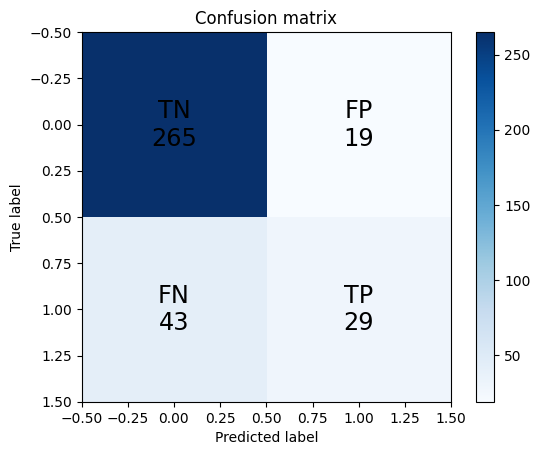

In [317]:
# 計算混淆矩陣
cm = confusion_matrix(true_labels, pred_labels)
print(cm)
print(classification_report(true_labels, pred_labels))

labels = np.array([["TN", "FP"], ["FN", "TP"]])
for m in range(cm.shape[0]):
    for n in range(cm.shape[1]):
        plt.text(x=m,y=n,s=f"{labels[n][m]}\n{cm[n][m]}", va='center', ha='center', size='xx-large')

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [318]:
torch.save(best_model,'my_model.pth')

In [319]:
model = torch.load('my_model.pth')




LSTM(
  (lstm): LSTM(18, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)